<a href="https://colab.research.google.com/github/RodrigoMendoza23/Act1/blob/main/Act1_italia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df= pd.read_csv('listings_ita.csv')

In [31]:
dfn= df[['room_type','host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication','number_of_reviews']].copy()

In [32]:
dfna=pd.read_csv("lift_ita2.csv")
dfna=dfna.fillna(method="bfill")

In [33]:
dfna.head()

,room_type,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,number_of_reviews
0,1,1.00,96.0,0.0,4.83,4.83,4.90,42
1,1,1.00,70.0,2.0,4.91,4.83,4.95,43
2,1,0.99,69.0,148.0,4.82,4.86,4.82,93
3,1,1.00,34.0,291.0,4.70,4.30,4.70,10
4,1,1.00,30.0,277.0,4.71,4.93,4.50,14


In [34]:
dfna=dfna.fillna(round(df.mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [35]:
valores_nulos=dfna.isnull().sum()
valores_nulos

room_type                      0
host_acceptance_rate           1
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
number_of_reviews              0
dtype: int64

In [36]:
y=dfna[['availability_365','host_acceptance_rate','price','review_scores_rating','review_scores_cleanliness','review_scores_communication','number_of_reviews']]
x=dfna['room_type']
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido availability_365               712.500
host_acceptance_rate             1.330
price                          182.500
review_scores_rating             5.495
review_scores_cleanliness        5.435
review_scores_communication      5.300
number_of_reviews               74.500
dtype: float64
Limite inferior permitido availability_365              -283.500
host_acceptance_rate             0.450
price                          -21.500
review_scores_rating             4.175
review_scores_cleanliness        4.275
review_scores_communication      4.500
number_of_reviews              -41.500
dtype: float64


In [37]:
df3=y[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

,availability_365,host_acceptance_rate,price,review_scores_rating,review_scores_cleanliness,review_scores_communication,number_of_reviews
0,0.0,1.00,96.0,4.83,4.83,4.90,42.0
1,2.0,1.00,70.0,4.91,4.83,4.95,43.0
2,148.0,0.99,69.0,4.82,4.86,4.82,NaN
3,291.0,1.00,34.0,4.70,4.30,4.70,10.0
4,277.0,1.00,30.0,4.71,4.93,4.50,14.0
...,...,...,...,...,...,...,...
2707,356.0,0.68,75.0,4.70,4.80,4.80,0.0
2708,289.0,0.83,50.0,4.70,4.80,4.80,0.0
2709,364.0,1.00,NaN,4.70,4.80,4.80,0.0
2710,333.0,1.00,79.0,4.70,4.80,4.80,0.0


In [38]:
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4=df4.assign(room_type=x)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   availability_365             2712 non-null   float64
 1   host_acceptance_rate         2712 non-null   float64
 2   price                        2712 non-null   float64
 3   review_scores_rating         2712 non-null   float64
 4   review_scores_cleanliness    2712 non-null   float64
 5   review_scores_communication  2712 non-null   float64
 6   number_of_reviews            2712 non-null   float64
 7   room_type                    2712 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 169.6 KB


In [39]:
Entire_home=df4[df4["room_type"] == 1]
Hotel_room=df4[df4["room_type"] == 3]
Private_room=df4[df4["room_type"] == 2]
Shared_room=df4[df4["room_type"] == 4]

## Entire home

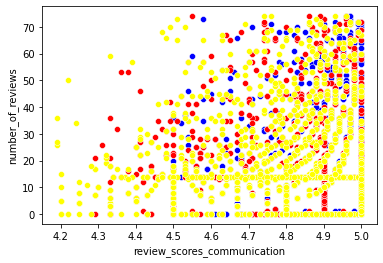

In [99]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="blue", data=Entire_home)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="red", data=Entire_home)
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="yellow", data=Entire_home)

In [100]:
Vars_Indep= Entire_home[['review_scores_rating', 'review_scores_cleanliness','review_scores_communication']]
Vars_dep=Entire_home["number_of_reviews"]

In [46]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()


In [47]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [51]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.57159657, -6.16930119, -2.96438807]),
 '_residues': 581892.1863575324,
 'rank_': 3,
 'singular_': array([10.30753056,  5.79888859,  4.56570675]),
 'intercept_': 56.281934453451356}

In [52]:
model.score(Vars_Indep,Vars_dep)

0.004704907076065745

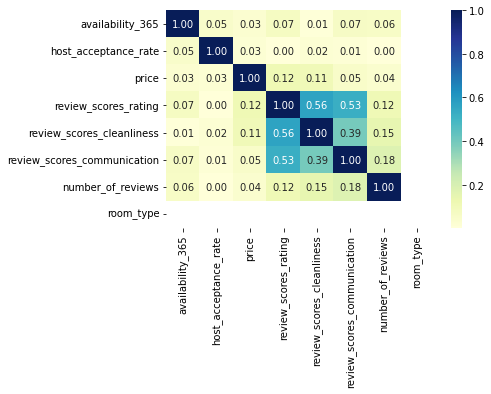

In [ ]:
Corr_Factors=Entire_home.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Hotel room 

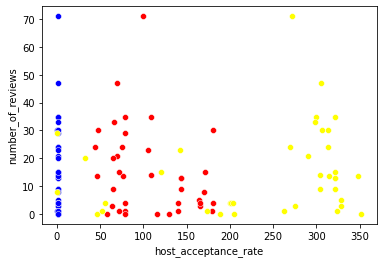

In [98]:
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="blue", data=Hotel_room)
sns.scatterplot(x='price', y='number_of_reviews', color="red", data=Hotel_room)
sns.scatterplot(x='availability_365', y='number_of_reviews', color="yellow", data=Hotel_room)

In [69]:
Vars_Indep= Hotel_room[['availability_365', 'price','host_acceptance_rate']]
Vars_dep=Hotel_room["number_of_reviews"]

In [70]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [71]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [72]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'price', 'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.02183081, -0.07927646, 17.07750084]),
 '_residues': 7839.053330507022,
 'rank_': 3,
 'singular_': array([656.15948499, 265.58892993,   0.81420102]),
 'intercept_': 2.7663852156449824}

In [73]:
model.score(Vars_Indep,Vars_dep)

0.11967571310898617

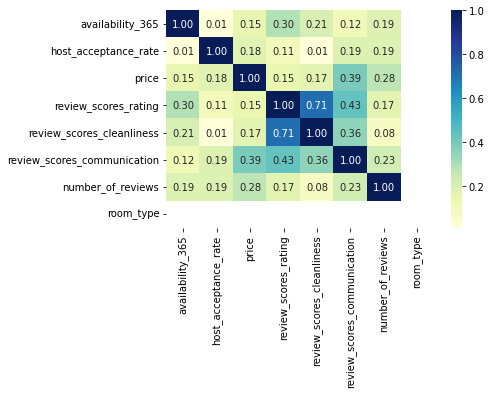

In [74]:
Corr_Factors=Hotel_room.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Private room 

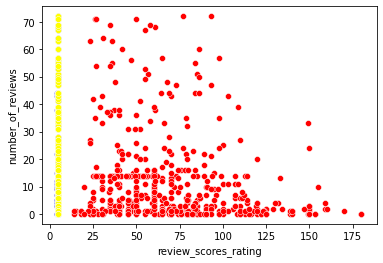

In [97]:
from turtle import color

sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=Private_room)
sns.scatterplot(x='price', y='number_of_reviews', color="red", data=Private_room)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=Private_room)

In [82]:
Vars_Indep= Private_room[['review_scores_communication', 'price','review_scores_rating']]
Vars_dep=Private_room["number_of_reviews"]

In [83]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [84]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [85]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication', 'price', 'review_scores_rating'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-17.36560251,  -0.0900709 ,  -4.3835974 ]),
 '_residues': 117709.91155669637,
 'rank_': 3,
 'singular_': array([749.98939844,   4.41037942,   2.3322796 ]),
 'intercept_': 123.81335029881588}

In [86]:
model.score(Vars_Indep,Vars_dep)

0.06857695293442989

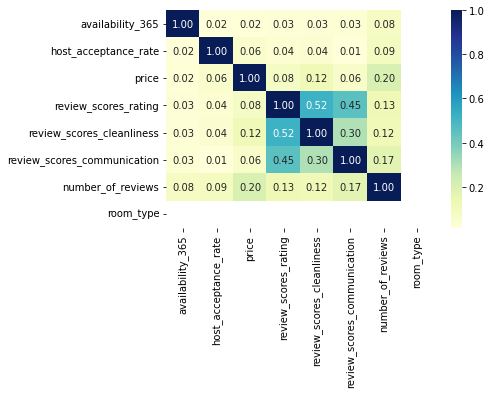

In [87]:
Corr_Factors=Private_room.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Shared room 

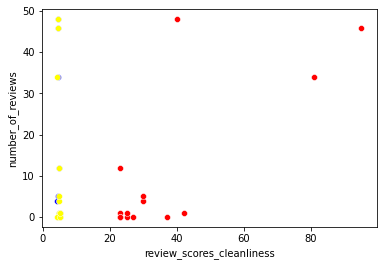

In [96]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="blue", data=Shared_room)
sns.scatterplot(x='price', y='number_of_reviews', color="red", data=Shared_room)
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="yellow", data=Shared_room)

In [89]:
Vars_Indep= Shared_room[['review_scores_cleanliness', 'price','review_scores_rating']]
Vars_dep=Shared_room["number_of_reviews"]

In [90]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [91]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [92]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'price', 'review_scores_rating'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-17.08761783,   0.45658905, -15.53736823]),
 '_residues': 1216.0477932203887,
 'rank_': 3,
 'singular_': array([81.25166344,  0.96053416,  0.69182294]),
 'intercept_': 147.57117258490908}

In [93]:
model.score(Vars_Indep,Vars_dep)

0.7043917713382856

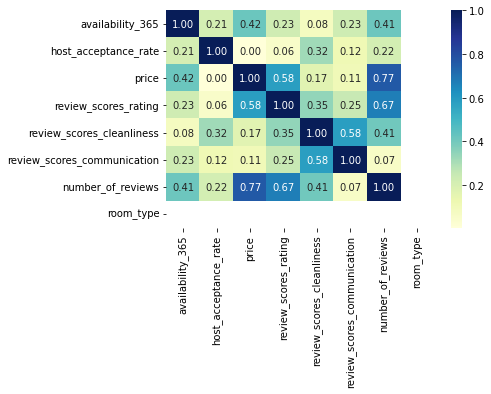

In [94]:
Corr_Factors=Shared_room.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map